- Name: Prathamesh Palatshaha
- Roll No.:21102A0022
- [SEM-7 ML Lab9 Github Link](https://github.com/Prathamesh-Palatshaha/Sem-VII)

Data shape: (1797, 64)
Target labels: [0 1 2 3 4 5 6 7 8 9]


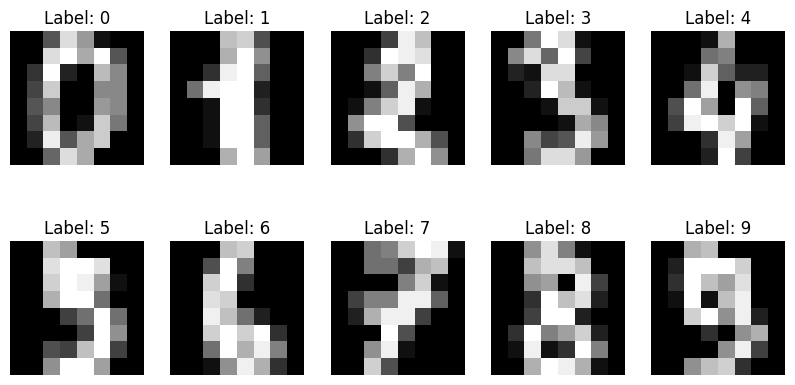

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the dataset
digits = load_digits()
print(f"Data shape: {digits.data.shape}")
print(f"Target labels: {digits.target[:10]}")

# Visualize some of the images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
digits_scaled = scaler.fit_transform(digits.data)


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the standardized data
pca = PCA(n_components=0.95)  # Preserve 95% of variance
digits_pca = pca.fit_transform(digits_scaled)

# Print the explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Number of components: {pca.n_components_}")


Explained variance ratio: [0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316 0.00944559 0.00863014 0.00836643 0.00797693 0.00746471
 0.00725582 0.00691911 0.00653909 0.00640793 0.00591384 0.00571162
 0.00523637 0.00481808 0.00453719 0.00423163]
Number of components: 40


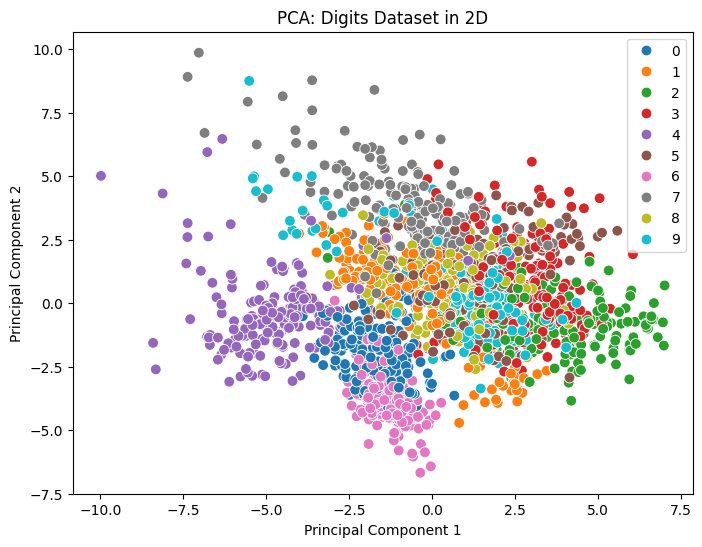

In [ ]:
import seaborn as sns

# Reduce to 2 components
pca_2d = PCA(n_components=2)
digits_2d = pca_2d.fit_transform(digits_scaled)

# Plotting the 2D projection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=digits_2d[:, 0], y=digits_2d[:, 1], hue=digits.target, palette="tab10", legend="full", s=60)
plt.title("PCA: Digits Dataset in 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


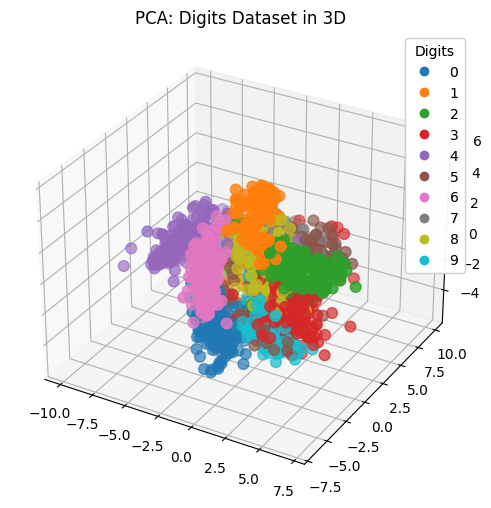

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3 components
pca_3d = PCA(n_components=3)
digits_3d = pca_3d.fit_transform(digits_scaled)

# Plotting the 3D projection
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(digits_3d[:, 0], digits_3d[:, 1], digits_3d[:, 2], c=digits.target, cmap='tab10', s=60)
legend1 = ax.legend(*scatter.legend_elements(), title="Digits")
ax.add_artist(legend1)
ax.set_title("PCA: Digits Dataset in 3D")
plt.show()


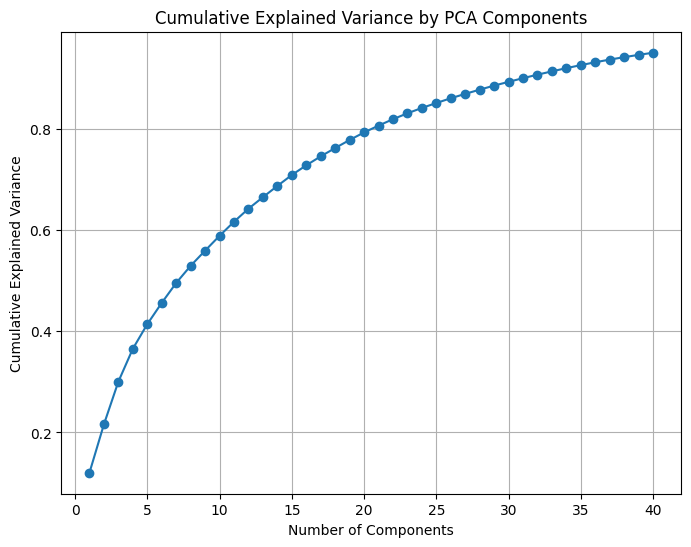

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()
